<a href="https://colab.research.google.com/github/devLarissaRodrigues/Bootcamp-DataAnalytics-WoMakersCode/blob/main/Exercicio_individual_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Data Analytics – WoMakersCode  
### 📝 Exercício individual 5

👩🏽‍💻 Aluna: Larissa Monique de Sousa Rodrigues (Squad: Mae C. Jemison)

## 📊 Análise de Correlação e Regressão (Simples e Multivariada)

### 🏠 Parte 1 – Base de Dados: kc_house_data.csv

Responda às questões de 1 a 6, utilizando a base de dados sobre imóveis:

1️⃣ Codifique e exiba a matriz de correlação entre as variáveis numéricas.  
➡️ Qual é a correlação entre o preço (price) e o número de quartos (bedrooms)?  
📏 Há diferença nessa correlação ao considerar apenas casas com área total (sqft_living) superior a 2000 pés quadrados?

2️⃣ Existe correlação entre o preço (price) e a área total da casa (sqft_living), considerando apenas casas com pelo menos dois banheiros (bathrooms)?

3️⃣ Como a quantidade de banheiros (bathrooms) influencia a correlação entre a área total da casa (sqft_living) e o preço (price)?

4️⃣ Qual é a relação entre a condição da casa (condition) e o preço (price), considerando apenas casas com área total superior a 3000 pés quadrados (sqft_living > 3000)?

5️⃣ Existe correlação entre a localização geográfica (lat e long) e o preço (price), para casas com pelo menos três quartos (bedrooms)?

6️⃣ Calcule a correlação entre a variável categórica (waterfront) e a variável numérica (price) utilizando o teste ANOVA.


### 🚗 Parte 2 – Base de Dados: car_price.csv

Responda às questões de 7 a 11, utilizando a base de dados sobre carros:

7️⃣ Codifique e exiba a matriz de correlação para as variáveis numéricas.  
🧭 Dê exemplos de correlação positiva, negativa e neutra entre os atributos.

8️⃣ Exiba gráficos de dispersão entre cada variável numérica e a variável de interesse Price.

9️⃣ Crie um modelo de Regressão Linear Simples, exiba a tabela de regressão e o gráfico da reta estimada.

🔟 Exiba o gráfico dos resíduos do modelo de Regressão Linear Simples.

🔢 Crie um modelo de Regressão Linear Multivariada, exiba a tabela de regressão e o gráfico dos resíduos do modelo.


## 📚 Importação de bibliotecas

Antes de começar, vamos importar as bibliotecas necessárias para manipulação, análise e visualização dos dados.

💻 Código

In [73]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np
import math

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Estatística
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

# Configurações estéticas para os gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### 📁🏠 Dataset: house (Visualização inicial)

Nesta etapa, vamos observar as primeiras linhas do dataset para entender sua estrutura, as colunas disponíveis e o formato dos dados.

Nosso objetivo aqui é ter uma visão geral antes de qualquer limpeza ou tratamento.

In [24]:
# Configurando URL a partir do id do arquivo compartilhado

file_id_house = "11ST3yeQ6k016OYeiHAPOkwFRjEq4CEpi"
url = f'https://drive.google.com/uc?id={file_id_house}&export=download'
house = pd.read_csv(url)
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


💻 Código

In [25]:
# Descrição da tabela
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.549550e+09,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,2.863859e+09,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.114001e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,3.905010e+09,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,7.272001e+09,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [50]:
# Seleciona variáveis numéricas
colunas_numericas_casas = house.select_dtypes(include=['float64', 'int64'])

# Calcula a matriz de correlação
corr_casas = colunas_numericas_casas.corr()

# Exibe a matriz de correlação
corr_casas

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005779,0.013855,0.007435,0.000415,-0.132510,0.012260,0.035295,-0.021744,0.012872,-0.007168,0.013732,0.011701,-0.015580,0.001720,0.000568,0.000084,-0.004075,-0.146583
price,0.005779,1.000000,0.299207,0.521193,0.702199,0.090720,0.276954,0.398731,0.044596,0.651100,0.607763,0.326087,0.036116,0.142752,-0.054596,0.297156,0.015786,0.583287,0.086809
bedrooms,0.013855,0.299207,1.000000,0.539449,0.573915,0.028929,0.213565,0.090767,0.023435,0.360955,0.464872,0.323817,0.164852,0.027509,-0.146440,0.001749,0.110417,0.376492,0.019946
bathrooms,0.007435,0.521193,0.539449,1.000000,0.764810,0.091268,0.494247,0.205681,-0.089029,0.660915,0.686311,0.311352,0.479104,0.070821,-0.204979,0.027687,0.217447,0.579341,0.099278
sqft_living,0.000415,0.702199,0.573915,0.764810,1.000000,0.167809,0.392802,0.293149,-0.047375,0.763526,0.869266,0.457630,0.324383,0.068572,-0.191899,0.062404,0.217292,0.750315,0.192839
sqft_lot,-0.132510,0.090720,0.028929,0.091268,0.167809,1.000000,0.021320,0.064464,-0.019324,0.121719,0.184876,0.006639,0.088609,-0.003411,-0.126821,-0.069145,0.225961,0.158669,0.690367
floors,0.012260,0.276954,0.213565,0.494247,0.392802,0.021320,1.000000,0.062255,-0.217362,0.463982,0.572961,-0.236646,0.405597,0.041302,-0.081076,0.042355,0.154666,0.327327,0.024016
view,0.035295,0.398731,0.090767,0.205681,0.293149,0.064464,0.062255,1.000000,0.044662,0.255709,0.174683,0.278300,-0.038961,0.113521,0.072961,-0.003913,-0.081587,0.289678,0.044554
condition,-0.021744,0.044596,0.023435,-0.089029,-0.047375,-0.019324,-0.217362,0.044662,1.000000,-0.126440,-0.144689,0.164491,-0.313085,-0.074973,-0.005119,-0.016654,-0.105288,-0.088211,-0.025178
grade,0.012872,0.651100,0.360955,0.660915,0.763526,0.121719,0.463982,0.255709,-0.126440,1.000000,0.760978,0.174460,0.438903,0.036942,-0.194369,0.111048,0.205292,0.731650,0.140770


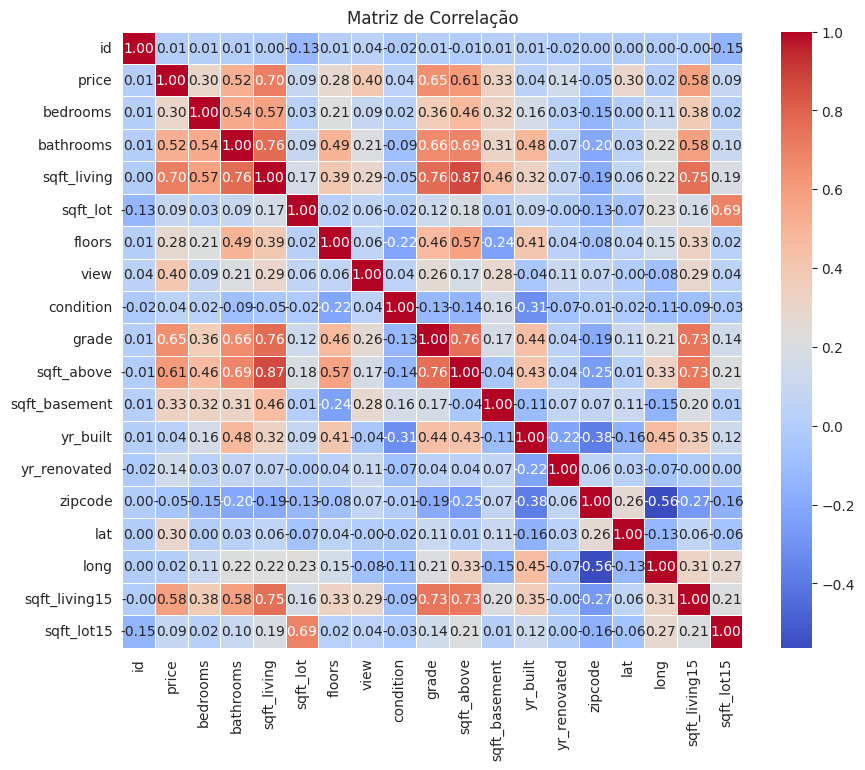

In [45]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_casas, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

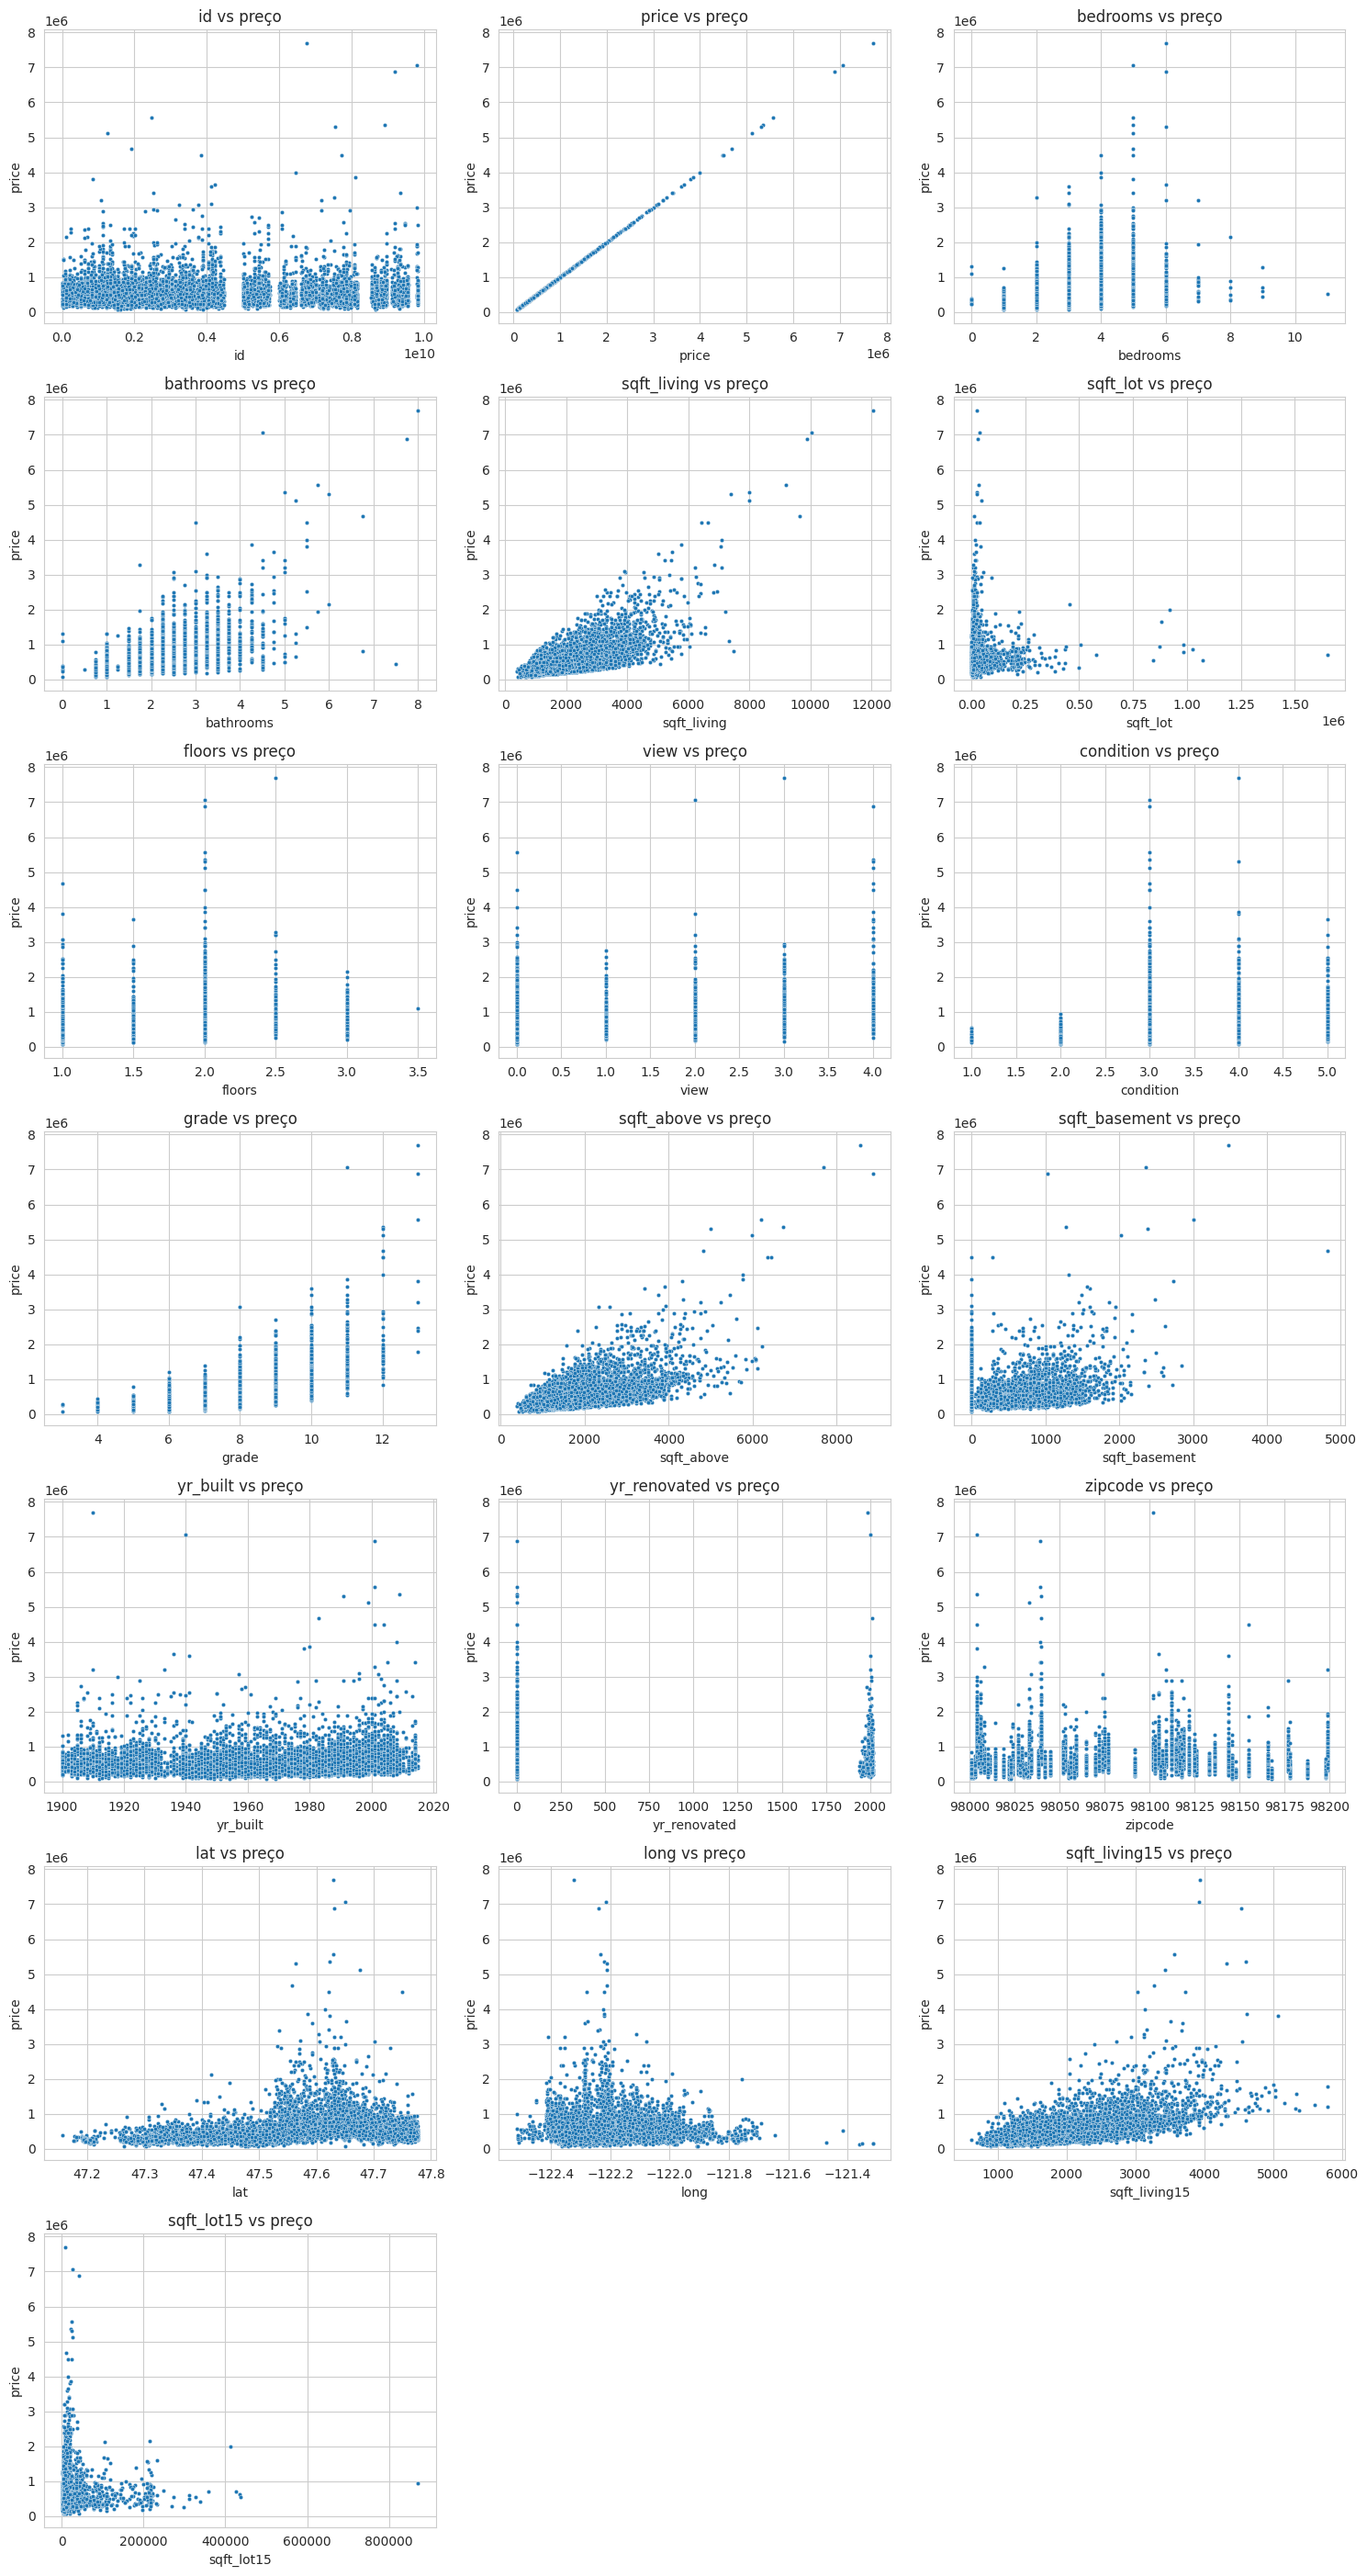

In [54]:
# Número de colunas por linha
colunas_por_linha = 3

# Número total de colunas numéricas
total = len(colunas_numericas_casas)

# Número de linhas necessárias
linhas = math.ceil(total / colunas_por_linha)

# Tamanho da figura total
plt.figure(figsize=(colunas_por_linha * 5, linhas * 4))

for i, column in enumerate(colunas_numericas_casas, 1):
    plt.subplot(linhas, colunas_por_linha, i)
    sns.scatterplot(data=house, x=column, y='price', s=10)
    plt.title(f'{column} vs preço')

plt.tight_layout()
plt.show()

In [57]:
# Correlação entre 'price' e 'bedrooms'
cor_price_bedrooms = house['price'].corr(house['bedrooms'])
print(f"Correlação entre preço (price) e número de quartos (bedrooms): {cor_price_bedrooms:.4f}")

# Filtrando apenas casas com área total (sqft_living) > 2000
df_maiores_2000 = house[house['sqft_living'] > 2000]
cor_price_bedrooms_maior2000 = df_maiores_2000['price'].corr(df_maiores_2000['bedrooms'])
print(f"Correlação entre preço e quartos (somente para casas com sqft_living > 2000): {cor_price_bedrooms_maior2000:.4f}")

Correlação entre preço (price) e número de quartos (bedrooms): 0.2992
Correlação entre preço e quartos (somente para casas com sqft_living > 2000): 0.1191


🧐 Correlação de valor entre 0,1 e 0,5 é considerada fraca. Sendo assim, como nos dois casos a correlação ficou dentro dessa faixa, pode-se inferir que não há diferença.

🏠 No entanto, pode-se obter alguns insights, como: para casas maiores, o número de quartos tem uma relação menos significativa com o preço, ao contrário do que ocorre para o conjunto geral de casas. Ou seja, para casas grandes, o preço pode ser mais influenciado por outros fatores, como a localização, o acabamento ou a qualidade geral da construção, em vez do número de quartos.




Correlação entre preço e área (casas com >= 2 banheiros): 0.7067107107996193
Correlação (banheiros = 0.75): 0.3572
Correlação (banheiros = 1.0): 0.3595
Correlação (banheiros = 1.5): 0.4234
Correlação (banheiros = 1.75): 0.4492
Correlação (banheiros = 2.0): 0.4469
Correlação (banheiros = 2.25): 0.5983
Correlação (banheiros = 2.5): 0.5599
Correlação (banheiros = 2.75): 0.5224
Correlação (banheiros = 3.0): 0.5690
Correlação (banheiros = 3.25): 0.5447
Correlação (banheiros = 3.5): 0.5664
Correlação (banheiros = 3.75): 0.4655
Correlação (banheiros = 4.0): 0.5845
Correlação (banheiros = 4.25): 0.4448
Correlação (banheiros = 4.5): 0.7960
Correlação (banheiros = 4.75): 0.6494
Correlação (banheiros = 5.0): 0.7472

Preço médio por condição (casas > 3000 sqft):
 condition
2    7.150000e+05
3    1.016932e+06
4    1.087104e+06
5    1.292893e+06
Name: price, dtype: float64


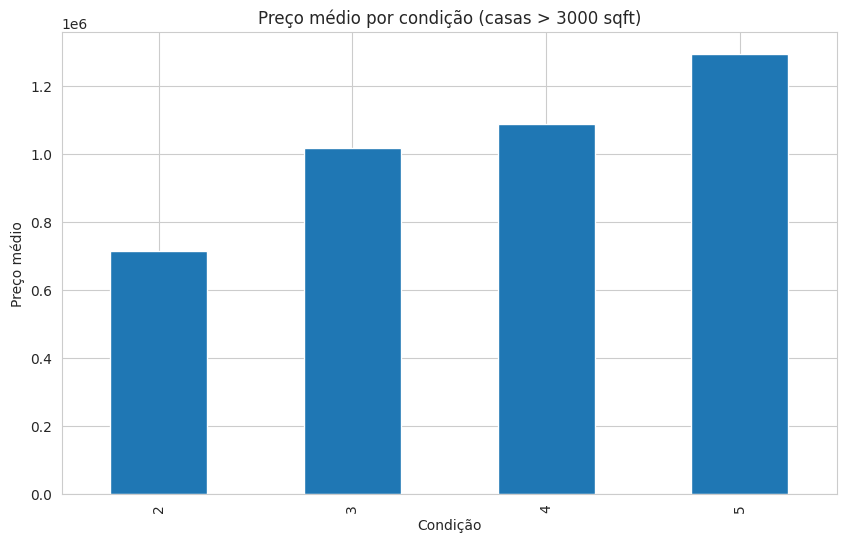


Correlação entre latitude e preço (>=3 quartos): 0.3125551424843217
Correlação entre longitude e preço (>=3 quartos): -0.007275306992926937


In [58]:
# Correlação entre preço e área total (casas com pelo menos 2 banheiros)
casas_com_2_banheiros = house[house['bathrooms'] >= 2]
correlacao_banho_area = casas_com_2_banheiros['price'].corr(casas_com_2_banheiros['sqft_living'])
print("\nCorrelação entre preço e área (casas com >= 2 banheiros):", correlacao_banho_area)

# Influência dos banheiros na correlação entre área e preço
banheiros_unicos = sorted(house['bathrooms'].unique())

for b in banheiros_unicos:
    subset = house[house['bathrooms'] == b]
    if len(subset) > 10:  # evita amostras muito pequenas
        cor = subset['price'].corr(subset['sqft_living'])
        print(f"Correlação (banheiros = {b}): {cor:.4f}")

# Relação entre condição e preço (casas com sqft_living > 3000)
casas_3000 = house[house['sqft_living'] > 3000]
media_por_condicao = casas_3000.groupby('condition')['price'].mean()
print("\nPreço médio por condição (casas > 3000 sqft):\n", media_por_condicao)

# Gráfico opcional
media_por_condicao.plot(kind='bar', title='Preço médio por condição (casas > 3000 sqft)')
plt.ylabel('Preço médio')
plt.xlabel('Condição')
plt.show()

# Correlação entre lat/long e preço (casas com pelo menos 3 quartos)
casas_3q = house[house['bedrooms'] >= 3]
cor_lat = casas_3q['price'].corr(casas_3q['lat'])
cor_long = casas_3q['price'].corr(casas_3q['long'])
print("\nCorrelação entre latitude e preço (>=3 quartos):", cor_lat)
print("Correlação entre longitude e preço (>=3 quartos):", cor_long)

In [66]:
# Garante que não há NaNs
grupo_sem_vista = house[(house['waterfront'] == 0) & (house['price'].notna())]['price']
grupo_com_vista = house[(house['waterfront'] == 1) & (house['price'].notna())]['price']

# Verifica se há pelo menos 2 valores únicos nos dois grupos
if len(grupo_com_vista.unique()) > 1 and len(grupo_sem_vista.unique()) > 1:
    t_stat, p_valor = ttest_ind(grupo_sem_vista, grupo_com_vista, equal_var=False)
    print("Estatística t:", t_stat)
    print("Valor-p:", p_valor)

    if p_valor < 0.05:
        print("📊 Diferença significativa: casas com vista têm preços diferentes.")
    else:
        print("ℹ️ Sem diferença significativa: vista para a água não impacta o preço.")
else:
    print("⚠️ Grupo(s) com pouca variação de preço. Teste estatístico não aplicável.")


⚠️ Grupo(s) com pouca variação de preço. Teste estatístico não aplicável.


⚠️ O teste estatístico (ANOVA ou teste t) não pôde ser aplicado devido à baixa variação nos preços do grupo de casas com vista para a água (waterfront = 1).
Isso significa que, mesmo com dados suficientes em quantidade, os preços dessas casas são muito parecidos entre si — o que impede a análise estatística de diferença entre os grupos.

📉 Sem variação, não há como detectar influência estatística.
Visualizações como boxplots ainda podem oferecer algum insight qualitativo, mas estatisticamente não é possível afirmar que a presença de vista para a água influencia o preço neste conjunto de dados.

In [ ]:
 Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?

### 📁🚗 Dataset: car_price (Visualização inicial)

Nesta etapa, vamos observar as primeiras linhas do dataset para entender sua estrutura, as colunas disponíveis e o formato dos dados.

Nosso objetivo aqui é ter uma visão geral antes de qualquer limpeza ou tratamento.

💻 Código

In [31]:
# Configurando URL a partir do id do arquivo compartilhado

file_id_car = "1Le2jOGO7oZ8YWlzj1Lqd8PtNZU4NSYqU"
url = f'https://drive.google.com/uc?id={file_id_car}&export=download'
car_price = pd.read_csv(url)
car_price.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [36]:
car_price.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [42]:
# Seleciona variáveis numéricas
colunas_numericas_carros = car_price.select_dtypes(include=['float64', 'int64'])

# Calcula a matriz de correlação
corr_carros = colunas_numericas_carros.corr()

# Exibe a matriz de correlação
corr_carros

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Price,1.000000,0.309381,-0.147276,0.568875,0.577100,0.092968,-0.024879,0.586109
Year,0.309381,1.000000,-0.291740,0.085178,0.182220,0.126849,-0.000113,0.044859
Kilometer,-0.147276,-0.291740,1.000000,0.037817,0.008479,0.085728,0.111103,0.052447
Length,0.568875,0.085178,0.037817,1.000000,0.797228,0.194704,0.298527,0.809812
Width,0.577100,0.182220,0.008479,0.797228,1.000000,0.326928,0.229056,0.791316
Height,0.092968,0.126849,0.085728,0.194704,0.326928,1.000000,0.695373,0.408717
Seating Capacity,-0.024879,-0.000113,0.111103,0.298527,0.229056,0.695373,1.000000,0.313928
Fuel Tank Capacity,0.586109,0.044859,0.052447,0.809812,0.791316,0.408717,0.313928,1.000000


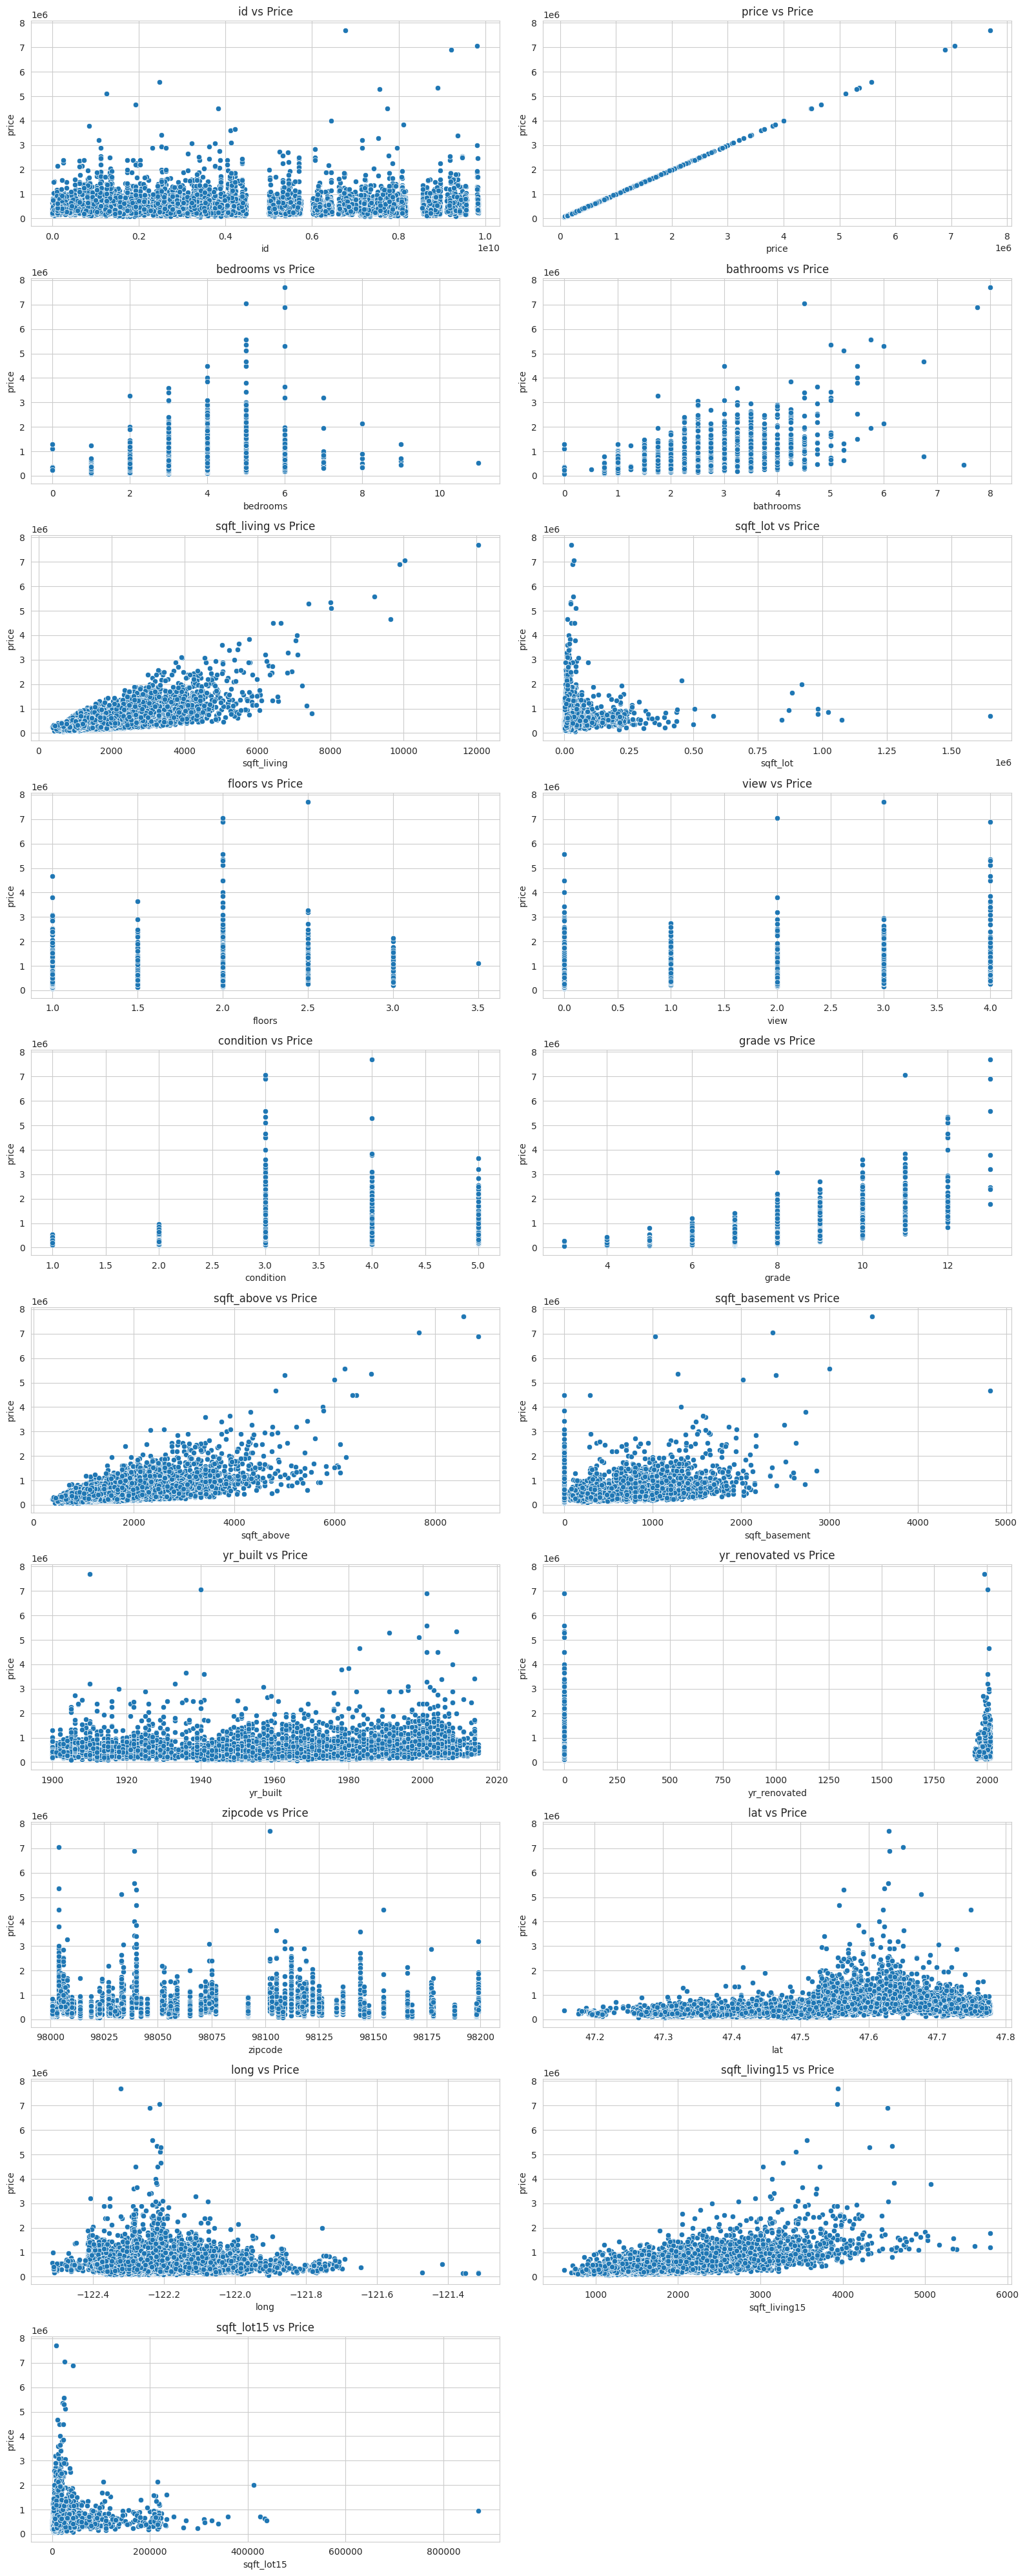

In [72]:
# Plotando em grids de 2 colunas
num_cols = len(colunas_numericas)
linhas = math.ceil(num_cols / 2)

plt.figure(figsize=(16, 4 * linhas))
for i, col in enumerate(colunas_numericas):
    plt.subplot(linhas, 2, i+1)
    sns.scatterplot(data=house, x=col, y='price')
    plt.title(f'{col} vs Price')
plt.tight_layout()
plt.show()

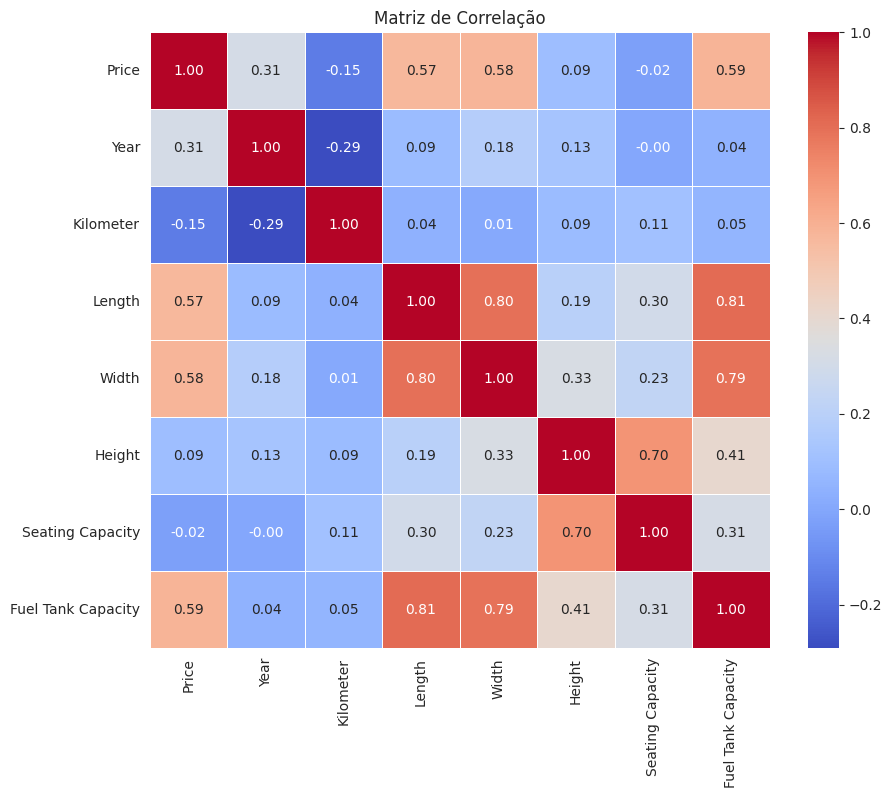

➡️ Correlação positiva: price e sqft_living
⬅️ Correlação negativa: price e Kilometer
➖ Correlação neutra: price e Height)


In [69]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_carros, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Exemplos
print("➡️ Correlação positiva: price e sqft_living")
print("⬅️ Correlação negativa: price e Kilometer")
print("➖ Correlação neutra: price e Height)")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9724.
Date:                Fri, 02 May 2025   Prob (F-statistic):               0.00
Time:                        19:09:26   Log-Likelihood:            -1.3918e+05
No. Observations:                9999   AIC:                         2.784e+05
Df Residuals:                    9997   BIC:                         2.784e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.311e+04   6618.505     -9.536      

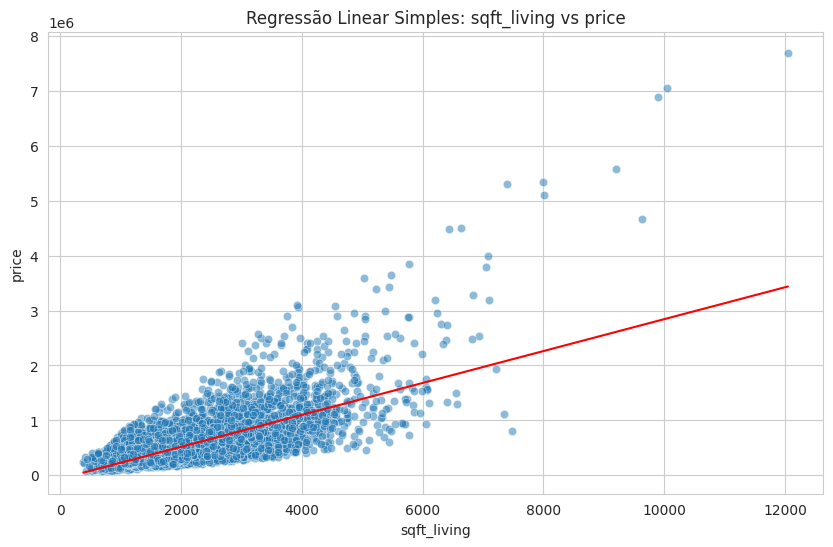

In [74]:
# Definindo X e y
X = house[['sqft_living']]
y = house['price']

# Adiciona constante (intercepto)
X_const = sm.add_constant(X)

# Modelo
modelo_simples = sm.OLS(y, X_const).fit()

# Tabela de regressão
print(modelo_simples.summary())

# Plot da reta estimada
sns.scatterplot(x=house['sqft_living'], y=house['price'], alpha=0.5)
sns.lineplot(x=house['sqft_living'], y=modelo_simples.fittedvalues, color='red')
plt.title('Regressão Linear Simples: sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()


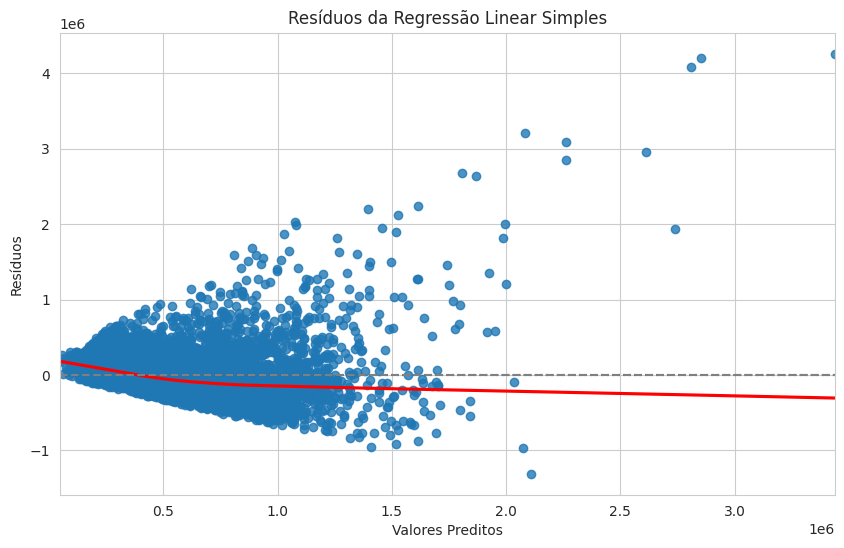

In [75]:
residuos = modelo_simples.resid

sns.residplot(x=modelo_simples.fittedvalues, y=residuos, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Resíduos da Regressão Linear Simples')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     2592.
Date:                Fri, 02 May 2025   Prob (F-statistic):               0.00
Time:                        19:09:59   Log-Likelihood:            -1.3902e+05
No. Observations:                9999   AIC:                         2.780e+05
Df Residuals:                    9994   BIC:                         2.781e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.622e+04   1.15e+04      6.602      

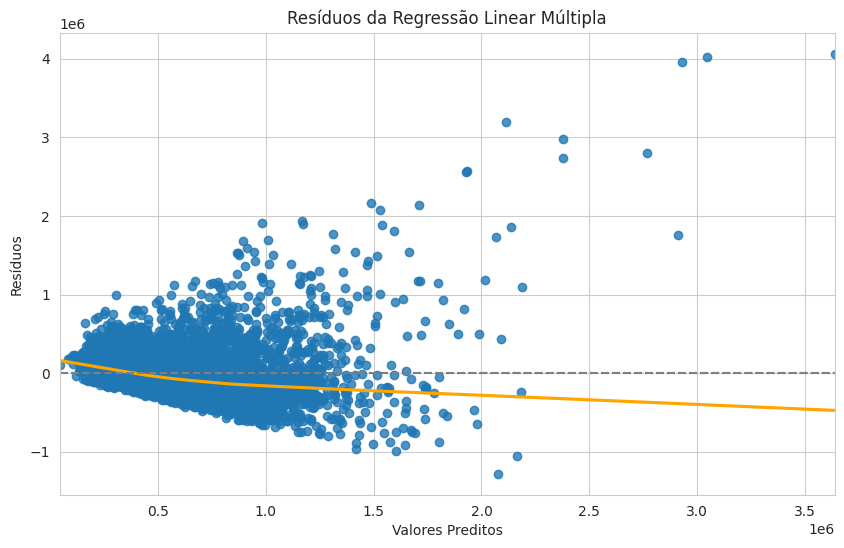

In [76]:
# Seleciona variáveis preditoras
X_multivariada = house[['sqft_living', 'bathrooms', 'bedrooms', 'floors']]
y = house['price']

X_const_multi = sm.add_constant(X_multivariada)

modelo_multiplo = sm.OLS(y, X_const_multi).fit()

# Tabela de regressão
print(modelo_multiplo.summary())

# Resíduos da multivariada
residuos_multi = modelo_multiplo.resid

sns.residplot(x=modelo_multiplo.fittedvalues, y=residuos_multi, lowess=True, line_kws={'color': 'orange'})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Resíduos da Regressão Linear Múltipla')
plt.show()
